# 소셜게임의 매상 분석
* 가상의 소셜게임 회사가 운영하는 가상의 소셜게임인 '퍼즐컬렉션'이 이번달에 들어 매상이 감소했습니다. 시장 환경이나 게임의 상태를 고려하면 아직은 더 성장할 것으로 예상했기 때문에 사내에서도 큰 문제로 인식하고 있습니다. 원인을 밝혀서 대책을 세우자며 분석 담당자에게 의뢰했습니다.

## 문제 발견

* 문제
  - 지난달에 비해 매상이 감소했다. (사실)
  - 이달은 지난달에 비해 광고를 적게 했다. (사실)
  - 그래서 신규 유저수가 줄어들었다. (가설)
  
* 해결책
  - 광고를 지난달과 같은 수준으로 한다.
  
* 데이터 분석 스토리 정리
  - 퍼즐컬렉션의 매상이 지난달에 비해 줄어들었다. (사실)
  - 매상 내역을 보았더니 신규 유저의 매상이 감소했다. (가설)
  - 광고를 지난달과 동등한 수준으로 실시한다. (해결책)

## 데이터 수집과 가공

* 분석에 필요한 데이터 검토
  - DAU(Daily Active User):하루에 한 번 이상 게임을 이용한 유저 데이터
  - DPU(Daily Payment User):하루에 1원 이상 지불한 유저 데이터
  - Install:유저별로 게임을 이용하기 시작한 날짜가 기록된 데이터
  
* 분석에 필요한 데이터 수집
1. 각각의 데이터 형식 확인

* 분석에 필요한 데이터 가공(전처리)

1. 유저(DAU)데이터에 이용시작(Install) 데이터 결합하기
2. 위 데이터에 과금(DPU) 데이터 다시 결합하기
3. 비과금 유저의 과금액에 0 넣기
4. 월차로 집계하기
5. 월차 데이터에 신규 유저인지 기존 유저인지 구분하는 항목 추가하기

## 데이터 분석

* 그래프로 데이터를 시각화하기

## 액션

## 정리
#### 히스토그램을 통한 데이터 분석 프로젝트 진행
지난달과 비교하여 매상이 떨어진 것을 문제로 정의하여 그 원인을 찾아보았고, 비지니스의 데이터 분석에서 중요한 것은 데이터를 분석하기 전에 관계부서와 가급적 많은 질의응답을 통해 사실을 파악하는 것이라고 느꼈음, 또한 그런 정보를 파악한 후 실현 가능한 스토리를 관계자들과 함께 생각하고, 데이터를 활용해서 검증하는 것 또한 중요하다고 느낌.


## 데이터 수집과 가공

* 분석에 필요한 데이터 검토
  - DAU(Daily Active User):하루에 한 번 이상 게임을 이용한 유저 데이터
  - DPU(Daily Payment User):하루에 1원 이상 지불한 유저 데이터
  - Install:유저별로 게임을 이용하기 시작한 날짜가 기록된 데이터
  
* 분석에 필요한 데이터 수집
1. 각각의 데이터 형식 확인

* 분석에 필요한 데이터 가공(전처리)

1. 유저(DAU)데이터에 이용시작(Install) 데이터 결합하기
2. 위 데이터에 과금(DPU) 데이터 다시 결합하기
3. 비과금 유저의 과금액에 0 넣기
4. 월차로 집계하기
5. 월차 데이터에 신규 유저인지 기존 유저인지 구분하는 항목 추가하기



In [1]:
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
#CSV 파일 읽어 들이기
dau = pd.read_csv('section3-dau.csv')
dpu = pd.read_csv('section3-dpu.csv')
install = pd.read_csv('section3-install.csv')

In [2]:
#각각의 데이터 확인
print(dau.shape, install.shape)

(139112, 3) (29330, 3)


In [3]:
# 분석에 필요한 데이터 가공(전처리)
# 유저(DAU)데이터에 이용시작(Install) 데이터 결합하기
dau.install = pd.merge(dau, install, on=['user_id', 'app_name'],how='left')
# dau.install = pd.concat([dau, install], axis = 1)
dau.install

/Users/maaanseop/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,log_date,app_name,user_id,install_date
0,2013-06-01,game-01,116,2013-04-17
1,2013-06-01,game-01,13491,2013-06-01
2,2013-06-01,game-01,7006,2013-05-03
3,2013-06-01,game-01,117,2013-04-17
4,2013-06-01,game-01,13492,2013-06-01
...,...,...,...,...
139107,2013-07-31,game-01,29326,2013-07-31
139108,2013-07-31,game-01,29327,2013-07-31
139109,2013-07-31,game-01,29328,2013-07-31
139110,2013-07-31,game-01,29329,2013-07-31


In [4]:
# 위 데이터에 과금(DPU) 데이터 다시 결합하기
dau.install.payment = pd.merge(dau.install, dpu, on=['log_date','app_name','user_id'], how='left')
dau.install.payment

/Users/maaanseop/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-01,game-01,13491,2013-06-01,NaN
2,2013-06-01,game-01,7006,2013-05-03,NaN
3,2013-06-01,game-01,117,2013-04-17,NaN
4,2013-06-01,game-01,13492,2013-06-01,NaN
...,...,...,...,...,...
139290,2013-07-31,game-01,29326,2013-07-31,NaN
139291,2013-07-31,game-01,29327,2013-07-31,NaN
139292,2013-07-31,game-01,29328,2013-07-31,NaN
139293,2013-07-31,game-01,29329,2013-07-31,NaN


In [5]:
# 비과금 유저(결측값) 확인
dau.install.payment.isnull().sum()
# 비과금 유저의 과금액에 0 넣기
dau.install.payment2 = dau.install.payment.fillna(0)
dau.install.payment2 = dau.install.payment2[['log_date','user_id','install_date','payment']]
dau.install.payment2

/Users/maaanseop/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,log_date,user_id,install_date,payment
0,2013-06-01,116,2013-04-17,0.0
1,2013-06-01,13491,2013-06-01,0.0
2,2013-06-01,7006,2013-05-03,0.0
3,2013-06-01,117,2013-04-17,0.0
4,2013-06-01,13492,2013-06-01,0.0
...,...,...,...,...
139290,2013-07-31,29326,2013-07-31,0.0
139291,2013-07-31,29327,2013-07-31,0.0
139292,2013-07-31,29328,2013-07-31,0.0
139293,2013-07-31,29329,2013-07-31,0.0


In [7]:
# 월차로 변경하기
dau.install.payment2['log_date']=pd.to_datetime(dau.install.payment2["log_date"])
dau.install.payment2['install_date']=pd.to_datetime(dau.install.payment2["install_date"])
dau.install.payment2['log_date']=dau.install.payment2['log_date'].dt.strftime('%Y-%m')
dau.install.payment2['install_date']=dau.install.payment2['install_date'].dt.strftime('%Y-%m')
# 월차별 데이터 집계하기
df = dau.install.payment2.groupby(['log_date','user_id','install_date','payment'])['payment'].sum().unstack()
# group_by_two = dau.install.payment2.groupby(['log_date','user_id','install_date'])
# group_by_three = round(group_by_two['payment'].agg([np.sum]))
# group_by_three
df

payment                        0.0      810.0    1620.0   2430.0   3240.0   \
log_date user_id install_date                                                
2013-06  1       2013-04           0.0      NaN      NaN      NaN      NaN   
         2       2013-04           0.0      NaN      NaN      NaN      NaN   
         3       2013-04           0.0      NaN      NaN      NaN      NaN   
         4       2013-04           0.0      NaN      NaN      NaN      NaN   
         6       2013-04           0.0      NaN      NaN      NaN      NaN   
...                                ...      ...      ...      ...      ...   
2013-07  29326   2013-07           0.0      NaN      NaN      NaN      NaN   
         29327   2013-07           0.0      NaN      NaN      NaN      NaN   
         29328   2013-07           0.0      NaN      NaN      NaN      NaN   
         29329   2013-07           0.0      NaN      NaN      NaN      NaN   
         29330   2013-07           0.0      NaN      NaN      NaN      NaN   

payment                        3330.0   4050.0   4860.0   5710.0   6480.0   \
log_date user_id install_date                                                
2013-06  1       2013-04           NaN      NaN      NaN      NaN      NaN   
         2       2013-04           NaN      NaN      NaN      NaN      NaN   
         3       2013-04        3330.0      NaN      NaN  28550.0      NaN   
         4       2013-04           NaN      NaN      NaN      NaN      NaN   
         6       2013-04           NaN      NaN      NaN      NaN      NaN   
...                                ...      ...      ...      ...      ...   
2013-07  29326   2013-07           NaN      NaN      NaN      NaN      NaN   
         29327   2013-07           NaN      NaN      NaN      NaN      NaN   
         29328   2013-07           NaN      NaN      NaN      NaN      NaN   
         29329   2013-07           NaN      NaN      NaN      NaN      NaN   
         29330   2013-07           NaN      NaN      NaN      NaN      NaN   

payment                        6660.0   7620.0   8100.0   9520.0   11420.0  \
log_date user_id install_date                                                
2013-06  1       2013-04           NaN      NaN      NaN      NaN      NaN   
         2       2013-04           NaN      NaN      NaN      NaN      NaN   
         3       2013-04           NaN      NaN      NaN  38080.0      NaN   
         4       2013-04           NaN      NaN      NaN      NaN      NaN   
         6       2013-04           NaN      NaN      NaN      NaN      NaN   
...                                ...      ...      ...      ...      ...   
2013-07  29326   2013-07           NaN      NaN      NaN      NaN      NaN   
         29327   2013-07           NaN      NaN      NaN      NaN      NaN   
         29328   2013-07           NaN      NaN      NaN      NaN      NaN   
         29329   2013-07           NaN      NaN      NaN      NaN      NaN   
         29330   2013-07           NaN      NaN      NaN      NaN      NaN   

payment                        12150.0  13330.0  14290.0  25710.0  
log_date user_id install_date                                      
2013-06  1       2013-04           NaN      NaN      NaN      NaN  
         2       2013-04           NaN      NaN      NaN      NaN  
         3       2013-04           NaN  79980.0      NaN      NaN  
         4       2013-04           NaN      NaN      NaN      NaN  
         6       2013-04           NaN      NaN      NaN      NaN  
...                                ...      ...      ...      ...  
2013-07  29326   2013-07           NaN      NaN      NaN      NaN  
         29327   2013-07           NaN      NaN      NaN      NaN  
         29328   2013-07           NaN      NaN      NaN      NaN  
         29329   2013-07           NaN      NaN      NaN      NaN  
         29330   2013-07           NaN      NaN      NaN      NaN  

[27036 rows x 19 columns]

In [ ]:
df.plot.bar(stacked=True)

In [7]:
#pivot table
pivot_table = pd.pivot_table(dau.install.payment2, index = ['log_date','user_id','install_date'], values=['payment'],aggfunc=[np.sum])
pivot_table

sum
                                payment
log_date user_id install_date          
2013-06  1       2013-04            0.0
         2       2013-04            0.0
         3       2013-04       149940.0
         4       2013-04            0.0
         6       2013-04            0.0
...                                 ...
2013-07  29326   2013-07            0.0
         29327   2013-07            0.0
         29328   2013-07            0.0
         29329   2013-07            0.0
         29330   2013-07            0.0

[27036 rows x 1 columns]

In [8]:
# df_groupby = dau.install.payment2.groupby(['log_date','user_id','install_date'])
# round(df_groupby['payment'].agg([np.sum]), 0)
# df_groupby

In [9]:
dau.install.payment2['user_id'].unique

<bound method Series.unique of 0           116
1         13491
2          7006
3           117
4         13492
          ...  
139290    29326
139291    29327
139292    29328
139293    29329
139294    29330
Name: user_id, Length: 139295, dtype: int64>

In [10]:
dau.install.payment2['log_date']#['user_id']

0         2013-06
1         2013-06
2         2013-06
3         2013-06
4         2013-06
           ...   
139290    2013-07
139291    2013-07
139292    2013-07
139293    2013-07
139294    2013-07
Name: log_date, Length: 139295, dtype: object

In [11]:
a=[]
for i in range(len(dau.install.payment2['log_date'])):
    a.append(dau.install.payment2['log_date'][i]==dau.install.payment2['install_date'][i])

In [12]:
b=[]
for i in range(len(a)):
    if a[i]==True:
        b.append('install')
    else:
        b.append('existing')

In [13]:
b=pd.Series(b)
b

0         existing
1          install
2         existing
3         existing
4          install
            ...   
139290     install
139291     install
139292     install
139293     install
139294     install
Length: 139295, dtype: object

In [14]:
dau.install.payment2['user.type']=b

In [15]:
b = dau.install.payment2
# a = dau.install.payment2[['log_date','user_id','install_date','payment']]
# a
b

,log_date,user_id,install_date,payment,user.type
0,2013-06,116,2013-04,0.0,existing
1,2013-06,13491,2013-06,0.0,install
2,2013-06,7006,2013-05,0.0,existing
3,2013-06,117,2013-04,0.0,existing
4,2013-06,13492,2013-06,0.0,install
...,...,...,...,...,...
139290,2013-07,29326,2013-07,0.0,install
139291,2013-07,29327,2013-07,0.0,install
139292,2013-07,29328,2013-07,0.0,install
139293,2013-07,29329,2013-07,0.0,install


In [16]:
junedata=b[b['log_date']=='2013-06']
julydata=b[b['log_date']=='2013-07']

In [17]:
june_id=junedata['user_id'].unique()
june_id.

SyntaxError: invalid syntax (228985460.py, line 2)

In [18]:
june_id=june_id.sort()
june_id

NameError: name 'june_id' is not defined

In [19]:
from tqdm.notebook import tqdm

In [95]:
b=[]
for i in tqdm(range(len(june_id))):
    a=[]
    for j in range(len(junedata['user_id'])):
        if junedata['user_id'][j]==june_id[i]:
            a.append(junedata['payment'])
    b.append(sum(a))
    
        

KeyboardInterrupt: 

In [91]:
june_id=june_id.tolist()
june_id.sort()
june_id

[1,
 2,
 3,
 4,
 6,
 7,
 8,
 10,
 11,
 15,
 17,
 18,
 19,
 23,
 28,
 30,
 33,
 34,
 35,
 37,
 40,
 41,
 45,
 47,
 49,
 50,
 52,
 54,
 55,
 57,
 65,
 71,
 73,
 75,
 78,
 79,
 81,
 84,
 89,
 92,
 94,
 98,
 101,
 105,
 106,
 109,
 110,
 113,
 116,
 117,
 118,
 121,
 122,
 123,
 126,
 128,
 129,
 130,
 133,
 137,
 139,
 141,
 142,
 144,
 145,
 146,
 149,
 151,
 152,
 154,
 155,
 157,
 158,
 159,
 160,
 164,
 166,
 170,
 171,
 172,
 173,
 174,
 175,
 178,
 181,
 182,
 183,
 184,
 186,
 188,
 189,
 195,
 197,
 200,
 203,
 205,
 208,
 210,
 213,
 214,
 220,
 221,
 225,
 226,
 227,
 229,
 233,
 235,
 237,
 238,
 242,
 243,
 245,
 246,
 249,
 251,
 253,
 254,
 255,
 257,
 258,
 259,
 261,
 264,
 265,
 267,
 268,
 269,
 272,
 273,
 274,
 275,
 277,
 281,
 282,
 284,
 285,
 286,
 287,
 292,
 294,
 296,
 298,
 301,
 303,
 304,
 305,
 307,
 309,
 310,
 311,
 312,
 314,
 316,
 317,
 324,
 325,
 328,
 329,
 330,
 332,
 336,
 337,
 339,
 340,
 342,
 345,
 346,
 347,
 350,
 351,
 352,
 354,
 356,
 360,

In [94]:
len(june_id)

14807

In [96]:
#pivot table
pivot_table = pd.pivot_table(dau.install.payment2, index = ['log_date','user_id','user.type',], values=['payment'],aggfunc=[np.sum])
pivot_table

sum
                             payment
log_date user_id user.type          
2013-06  1       existing        0.0
         2       existing        0.0
         3       existing   149940.0
         4       existing        0.0
         6       existing        0.0
...                              ...
2013-07  29326   install         0.0
         29327   install         0.0
         29328   install         0.0
         29329   install         0.0
         29330   install         0.0

[27036 rows x 1 columns]

In [98]:
#csv파일화하기
pivot_table.to_excel('./dd.xlsx')

In [20]:
aaaa=pd.read_csv('./ac.csv')

In [21]:
aa=aaaa[['log_date','payment']]
aa

,log_date,payment
0,2013-06,0.0
1,2013-06,0.0
2,2013-06,149940.0
3,2013-06,0.0
4,2013-06,0.0
...,...,...
27031,2013-07,0.0
27032,2013-07,0.0
27033,2013-07,0.0
27034,2013-07,0.0


In [116]:
plt.hist(data=aa, x = 'log_date', y='payment')

TypeError: can only concatenate str (not "numpy.float64") to str

ConversionError: Failed to convert value(s) to axis units: 'payment'

<Figure size 432x288 with 1 Axes>

In [43]:
# df_groupby = dau.install.payment2.groupby(['log_date','user_id','install_date'])
# round(df_groupby['payment'].agg([np.sum]), 0)
# df_groupby
df = dau.install.payment2.groupby(['log_date','user_id','install_date'])['payment'].sum()
df

log_date  user_id  install_date
2013-06   1        2013-04              0.0
          2        2013-04              0.0
          3        2013-04         149940.0
          4        2013-04              0.0
          6        2013-04              0.0
                                     ...   
2013-07   29326    2013-07              0.0
          29327    2013-07              0.0
          29328    2013-07              0.0
          29329    2013-07              0.0
          29330    2013-07              0.0
Name: payment, Length: 27036, dtype: float64

In [44]:
df['user_id']

KeyError: 'user_id'

## 데이터 분석

* 그래프로 데이터를 시각화하기

In [40]:
a=pd.DataFrame(pivot_table)
a

sum
                                payment
log_date user_id install_date          
2013-06  1       2013-04            0.0
         2       2013-04            0.0
         3       2013-04       149940.0
         4       2013-04            0.0
         6       2013-04            0.0
...                                 ...
2013-07  29326   2013-07            0.0
         29327   2013-07            0.0
         29328   2013-07            0.0
         29329   2013-07            0.0
         29330   2013-07            0.0

[27036 rows x 1 columns]

In [ ]:
# 맷플롯립을 가져온다.
import matplotlib as mpl
# 맷플롯립에서 pyplot라는 서브패키지(모듈)를 가져온다.
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.hist(data=pivot_table, x = 'log_date', y='payment')

TypeError: can only concatenate str (not "numpy.float64") to str

ConversionError: Failed to convert value(s) to axis units: 'payment'

<Figure size 432x288 with 1 Axes>

In [117]:
plt.bar(aaaa,)

TypeError: bar() missing 1 required positional argument: 'height'

In [128]:
#plt.bar(aaaa['log_date'],np.sum(aaaa['payment']))

In [10]:
aaaa = pd.read_csv('ac.csv')

x = aaaa['log_date']
y = aaaa['payment']


<BarContainer object of 27036 artists>

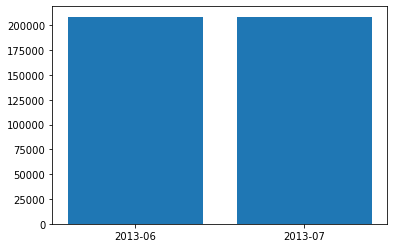

In [11]:
plt.bar(x, y)

In [16]:
aaaa

,log_date,user_id,user.type,payment
0,2013-06,1,existing,0.0
1,2013-06,2,existing,0.0
2,2013-06,3,existing,149940.0
3,2013-06,4,existing,0.0
4,2013-06,6,existing,0.0
...,...,...,...,...
27031,2013-07,29326,install,0.0
27032,2013-07,29327,install,0.0
27033,2013-07,29328,install,0.0
27034,2013-07,29329,install,0.0


In [24]:
!pip install plotnine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 1.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 891.3 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 836.5 kB/s eta 0:00:00a 0:00:01


In [26]:
from plotnine import *
import matplotlib.pyplot as plt
fig = plt.Figure()

(ggplot(aaaa, aes(x='log_date') + geom_bar(stat='count')))

PlotnineError: "Cannot add layer to object of type <class 'plotnine.mapping.aes.aes'>"

In [17]:
order_list = aaaa['user.type'].value_counts().index.tolist()

In [21]:
sns.countplot(data=aaaa, x='log_date',hue=order_list[0:27037])

ValueError: Length of values (2) does not match length of index (27036)